In [ ]:
# Step 1: Import Required Modules
import pandas as pd
import numpy as np
import re
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#  Step 2: Load and Prepare Dataset
data = pd.read_csv("/content/spam (1).csv", encoding='latin-1')

# Keep only the useful columns (assumes 'Category' and 'Message')
emails = data[['v1', 'v2']].copy()
emails.columns = ['label', 'text']


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:

#inplace= True because we permanently want to bring change in the original dataset
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3418,spam,Do you want a new Video phone? 600 anytime any...,NaN,NaN,NaN
5292,spam,Urgent! Please call 09061213237 from landline....,NaN,NaN,NaN
5084,ham,Hey happy birthday...,NaN,NaN,NaN
1319,ham,Correct. So how was work today,NaN,NaN,NaN
2431,ham,That's good. Lets thank God. Please complete t...,NaN,NaN,NaN


In [ ]:
#now lets check the missing values
data.isnull().sum()
# there are no missing values

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:

# now lets check for duplicated value
data.duplicated().sum()

np.int64(403)

In [ ]:

#remove the duplicates
data= data.drop_duplicates()

In [ ]:
#recheck
data.duplicated().sum()

np.int64(0)

In [ ]:
# Exploratory Data Analysis
#Lets visualize this classification problem to get a better understanding of the data

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

data['v1'].value_counts()

,count
v1,
ham,4516
spam,653


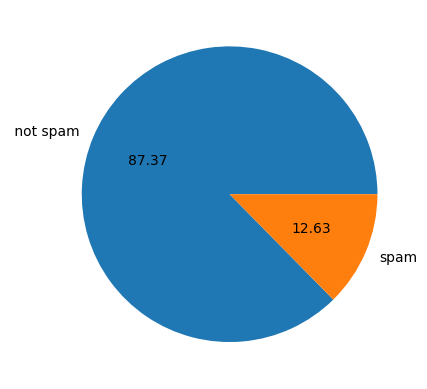

In [ ]:
plt.pie(data['v1'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

In [ ]:
#  Step 3: Text Cleaning and Preprocessing
def preprocess(text):
    # Remove punctuation and digits
    text = re.sub(r'[0-9]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Lowercase and tokenize
    words = text.lower().split()
    # Remove stopwords
    filtered_words = [w for w in words if w not in stop_words]
    return " ".join(filtered_words)

emails['clean_text'] = emails['text'].astype(str).apply(preprocess)

In [ ]:
#  Step 4: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=3000)  # limit features for light model
X_features = tfidf.fit_transform(emails['clean_text'])
y_labels = emails['label']

In [ ]:
#  Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.25, random_state=7)



In [ ]:
# 🤖 Step 6: Train Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# 🧪 Step 7: Evaluate the Model
y_pred = nb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label='spam')
rec = recall_score(y_test, y_pred, pos_label='spam')



In [ ]:
# 🖨️ Step 8: Print Results
print(f"\n Model Evaluation:")
print(f"Accuracy:  {acc:.2%}")
print(f"Precision: {prec:.2f}")
print(f"Recall:    {rec:.2f}")


 Model Evaluation:
Accuracy:  97.13%
Precision: 0.99
Recall:    0.79


In [ ]:
#diiferent methods also i tried but the above one is the best
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
gnb.fit(X_train.toarray(),y_train)
y_pred1= gnb.predict(X_test.toarray())
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
# Specify the pos_label as 'spam' since the labels are strings
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1, pos_label='spam'))

Accuracy score of Gaussian NB is:  0.8758076094759512
Confusion Matrix of Guassian NB is:  [[1066  145]
 [  28  154]]
Precision score of the Gaussian NB is 0.5150501672240803


In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
# Specify the pos_label as 'spam' since the labels are strings
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2, pos_label='spam'))

Accuracy score of Multinomial NB is:  0.9712849964106246
Confusion Matrix of Multinomial NB is:  [[1210    1]
 [  39  143]]
Precision score of the Multinomial NB is 0.9930555555555556


In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
# Specify the pos_label as 'spam' since the labels are strings
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3, pos_label='spam'))

Accuracy score of Bernoulli NB is:  0.9784637473079684
Confusion Matrix of Bernoulli NB is:  [[1208    3]
 [  27  155]]
Precision score of the Bernoulli NB is 0.9810126582278481


In [ ]:
def predict_spam(email_text):
    # Transform the text into TF-IDF vector
    vector = vectorizer.transform([email_text])
    # Predict using the trained model
    prediction = nb_model.predict(vector)[0]
    return "SPAM" if prediction == "spam" else "HAM"


In [ ]:
#  Example 1 - likely SPAM
test_email_1 = "Congratulations! You've won a free iPhone. Click here to claim."
print("Prediction:", predict_spam(test_email_1))

# Example 2 - likely HAM
test_email_2 = "Hey, just checking in. Can we reschedule the meeting to 3 PM?"
print("Prediction:", predict_spam(test_email_2))


Prediction: SPAM
Prediction: HAM


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create a larger input text box
email_box = widgets.Textarea(
    value='',
    placeholder='Paste your email here...',
    description='Email Text:',
    layout=widgets.Layout(width='100%', height='200px'),
    style={'description_width': 'initial'}
)

# Button to check prediction
check_button = widgets.Button(
    description='Check for Spam',
    button_style='success'
)

# Output display
output = widgets.Output()

# Prediction logic
def on_button_click(b):
    with output:
        clear_output()
        email_text = email_box.value
        result = predict_spam(email_text)
        print("Prediction:", result)

# Bind button click
check_button.on_click(on_button_click)

# Display UI
display(email_box, check_button, output)


Textarea(value='', description='Email Text:', layout=Layout(height='200px', width='100%'), placeholder='Paste …

Button(button_style='success', description='Check for Spam', style=ButtonStyle())

Output()

In [ ]:
pip install flask flask-wtf wtforms pandas joblib

In [ ]:
import joblib
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer # Assuming tfidf was defined earlier

# Assuming nb_model was defined and trained in a previous cell.
# If not, re-initialize and train it here for demonstration, but the best practice
# is to run the previous cell where it was trained.
# For this fix, we assume nb_model and tfidf were defined in previous successful runs.

# Assign the trained model to a variable named best_model
# Assuming nb_model from Step 6 is considered the best model
best_model = nb_model # This line will now work if the previous cell defining nb_model ran successfully

# Assign the trained TF-IDF vectorizer to a variable named vectorizer
vectorizer = tfidf # This line will now work if the previous cell defining tfidf ran successfully

# Save the best model
joblib.dump(best_model, "spam_model.pkl")

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']